**Data Description**

For this problem, we will use the MNIST data which is a huge dataset containing handwritten digits. We don't have actual images rather we have its pixels.

Since each image has $28 \times 28$ pixels and each pixel form a feature. There are 784 features. These features are recorded in CSV files. One for the training a model and another for testing the model. The **pixel values** of each digit (image) comprise the features, and the actual number between 0 and 9 is the label.

Here are the examples of the images of the handwritten used in the dataset.

<center><img src = "https://s3-whjr-v2-prod-bucket.whjr.online/359b49aa-47db-46f6-b4e7-7b3d8dc99f46.png" width = 700></center>



---

#### Loading Data

Let's load both the training and the test datasets. Here are the links to the required two CSV files.

1. **Train set:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/train.csv

2. **Test set:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/test.csv

**Dataset credits:** http://yann.lecun.com/exdb/mnist/

In [1]:
!wget -O train.csv  https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/train.csv
!wget -O test.csv  https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/test.csv

--2021-11-25 19:22:28--  https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/train.csv
Resolving s3-student-datasets-bucket.whjr.online (s3-student-datasets-bucket.whjr.online)... 99.86.89.129, 99.86.89.11, 99.86.89.54, ...
Connecting to s3-student-datasets-bucket.whjr.online (s3-student-datasets-bucket.whjr.online)|99.86.89.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76775041 (73M) [text/csv]
Saving to: ‘train.csv’

train.csv           100%[===================>]  73.22M  20.3MB/s    in 3.6s    

2021-11-25 19:22:33 (20.3 MB/s) - ‘train.csv’ saved [76775041/76775041]

--2021-11-25 19:22:33--  https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/test.csv
Resolving s3-student-datasets-bucket.whjr.online (s3-student-datasets-bucket.whjr.online)... 99.86.89.129, 99.86.89.54, 99.86.89.11, ...
Connecting to s3-student-datasets-bucket.whjr.online (s3-student-datasets-bucket.whjr.

In [2]:
# Import the libraries and load the CSV files.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()
# dff = dff.drop(['label'], axis=1)
# dff.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---


To draw an image of a number, we first need its pixel values reshaped so that we have a 2d array of size 784. 
Then using those pixel values, we will draw the image.  
The syntax to draw an image is: 
1. plt.imshow(*pixel_values*, cmap = 'gray', vmin = 0, vmax = 255)
2. plt.show()
**Note:** Here *pixel_values* is an array containing the values of a paricular row of the dataset. 

In [5]:
# pixel_value = dff.to_numpy()[0]
# pixel_value = pixel_value.reshape(28, -1)
# plt.imshow(pixel_value.reshape(28, -1), cmap = 'gray', vmin = 0, vmax = 255)
# plt.show()

Now, from the above data frame, create an image of the first instance of the digit 6.

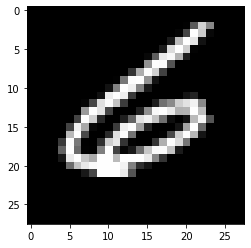

In [16]:
# Create an image from the pixel values of the image of the digit 6.
pixel=df[df['label']==6].to_numpy()[0][1:]
pixel= pixel.reshape(28,-1)
plt.imshow(pixel.reshape(28,-1),cmap = 'gray', vmin = 0, vmax = 255)
plt.show()


---

In [7]:
# Find out the counts of records for each digit in the training dataset.

df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

---

#### Normalisation

Scale down the pixel values of each image because the models are sensitive to numeric data.  

Divide each pixel value for each image by 255 (the greatest pixel value for a grayscale image) to reduce the values between 0 and 1.



In [8]:
# S1.1: Create features and target data frames and divide each pixel for each image by 255.0
# Note: Label column should not be normalised.
#from sklearn import preprocessing


from sklearn.model_selection import train_test_split
X=df.to_numpy()[:,1:]/255.0
y=df.to_numpy()[:,0]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print(y_train)


[5 0 3 ... 2 9 2]


---

In [9]:
# S2.1: Build an Logistic Regression model.
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression(max_iter=30)
LR_Model = LR_Model.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [10]:
# S2.2: Predict the target values for the training set.
from sklearn.metrics import accuracy_score
y_predicted  = LR_Model.predict(X_test)
y_predicted_probability  = LR_Model.predict_proba(X_test)
print(y_predicted_probability)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1),y_test.reshape(len(y_test),1)),1))
print("Accuracy score is =",str(round(accuracy_score(y_test,y_predicted)*100))+'%')

[[9.98630751e-01 1.73557319e-14 9.39875396e-06 ... 9.31177462e-09
  1.41164361e-05 6.04762655e-08]
 [6.03339873e-05 1.91769836e-07 2.53641915e-04 ... 4.81283821e-04
  6.13513304e-03 2.83048814e-02]
 [9.68775954e-01 1.40037882e-12 3.72567974e-04 ... 2.65195895e-06
  4.73396289e-04 8.62480540e-06]
 ...
 [9.90883897e-01 5.70717447e-11 2.15788932e-03 ... 5.22539318e-09
  2.96063067e-05 1.42245705e-09]
 [1.98935264e-05 1.20333948e-05 2.21158201e-04 ... 3.77850755e-05
  2.17385017e-03 5.07630687e-04]
 [1.82653986e-07 9.43548435e-01 2.41001475e-02 ... 1.77323587e-02
  5.69853354e-03 1.24982387e-03]]
[[0 0]
 [4 4]
 [0 0]
 ...
 [0 0]
 [3 3]
 [1 1]]
Accuracy score is = 92%


A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False.
Syntax of it is: 
1. from sklearn.metrics import classification_report
2. classification report(*actual value*, *predicted value*) 

In [11]:
# S2.4: Print the classification report to further evaluate the efficacy of the model.
from sklearn.metrics import classification_report
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       834\n           1       0.95      0.97      0.96       907\n           2       0.89      0.90      0.89       843\n           3       0.91      0.86      0.89       851\n           4       0.92      0.93      0.93       761\n           5       0.89      0.84      0.87       753\n           6       0.94      0.96      0.95       858\n           7       0.93      0.91      0.92       898\n           8       0.86      0.90      0.88       803\n           9       0.89      0.90      0.89       892\n\n    accuracy                           0.92      8400\n   macro avg       0.91      0.91      0.91      8400\nweighted avg       0.92      0.92      0.92      8400\n'

---

S3: Test Set

In [12]:
# S3.1: Divide each pixel value in the test set by 255 (to normalize it).
df2 = pd.read_csv('test.csv')
X_test2=df2.to_numpy()/255.0


In [13]:
# S3.2: Predict the digits for the test set using the Logistic Regression Model built above.
y_predicted2  = LR_Model.predict(X_test2)

In [14]:
# S3.3: Get the count of the predicted labels (or handwritten digits) to see their distributio
pd.DataFrame(np.asarray(np.unique(y_predicted2,return_counts=True)).T)

,0,1
0,0,2787
1,1,3261
2,2,2795
3,3,2657
4,4,2758
5,5,2481
6,6,2766
7,7,2892
8,8,2824
9,9,2779


---

In [15]:
# Calculate and print the error getting on both the test dataset and the train dataset. 
from sklearn.metrics import mean_squared_error

print("Mean Squared Error for the model on the dataset: {}".format(mean_squared_error(y_test, y_predicted)))


Mean Squared Error for the model on the dataset: 1.4303571428571429
